In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
 

In [2]:
# gaussian function
def gaussian_func(x, A, mu, sigma):
    return A * np.exp( - (x - mu)**2 / (2 * sigma**2))

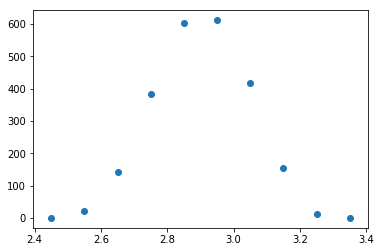

In [3]:
 
# generate toy data
x = np.array([2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05, 3.15, 3.25, 3.35])
y = np.array([0.000333333333401242, 22.0373333333334, 142.074333333333, 383.444666666667, 602.815, 611.185333333333, 417.555666666667, 154.926, 13.2963333333335, 0])
plt.scatter(x,y)
 

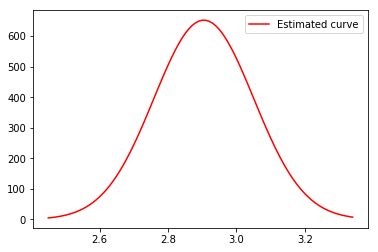

In [4]:
# initial_guess_of_parameters
# この値はソルバーとかで求めましょう．
parameter_initial = np.array([652, 2.9, 1.3])
 
# estimate optimal parameter & parameter covariance
popt, pcov = curve_fit(gaussian_func, x, y, p0=parameter_initial)
 
# plot result
xd = np.arange(x.min(), x.max(), 0.01)
estimated_curve = gaussian_func(xd, popt[0], popt[1], popt[2])
plt.plot(xd, estimated_curve, label="Estimated curve", color="r")
plt.legend()
plt.savefig("gaussian_fitting.png")
plt.show()
 

In [5]:
# estimate standard Error
StdE = np.sqrt(np.diag(pcov))
 
# estimate 95% confidence interval
alpha=0.025
lwCI = popt + norm.ppf(q=alpha)*StdE
upCI = popt + norm.ppf(q=1-alpha)*StdE
 
# print result
mat = np.vstack((popt,StdE, lwCI, upCI)).T
df=pd.DataFrame(mat,index=("A", "mu", "sigma"),
columns=("Estimate", "Std. Error", "lwCI", "upCI"))
print(df)

         Estimate  Std. Error        lwCI        upCI
A      652.173659   11.491564  629.650608  674.696710
mu       2.904722    0.002973    2.898895    2.910548
sigma   -0.146120    0.002973   -0.151948   -0.140293
